<h3 align="right">STR, &nbsp; dSPN, &nbsp; (e) 150917_c10_D1, &nbsp; (m) WT-P270-20 <br> </h3>

# Model selection

## Model data

In [1]:
import cell_model, cell_evaluator
morphofile = 'morphology/WT-P270-20-15ak-cor.swc'
parameters = cell_model.define_parameters('parameters.json')
mechanisms = cell_model.define_mechanisms('mechanisms.json')
protocols = cell_evaluator.define_protocols('protocols.json')
calculator = cell_evaluator.define_fitness_calculator(protocols, 'features.json')
expdata = {
    'IV_505.soma.v': 'expdata/ECBL_IV_ch3_505.dat',
    'IV_509.soma.v': 'expdata/ECBL_IV_ch3_509.dat',
    'IDthresh-sub_547.soma.v': 'expdata/ECBL_IDthresh_ch3_547.dat',
    'IDthresh_548.soma.v': 'expdata/ECBL_IDthresh_ch3_548.dat',
    'IDthresh_549.soma.v': 'expdata/ECBL_IDthresh_ch3_549.dat',
    'IDthresh_550.soma.v': 'expdata/ECBL_IDthresh_ch3_550.dat'
}

## Simulation environment

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
import json
import pandas
import efel
import numpy as np
import bluepyopt as bpopt
import bluepyopt.ephys as ephys

In [4]:
from utils import *

In [5]:
!rm -rf x86_64
!nrnivmodl mechanisms

Creating x86_64 directory for .o files.

/home/akozlov/prog/bgmod/models/optim/str-dspn-e150917_c10_D1-mWT-P270-20-v20181120
ls: cannot access 'mechanisms/*.inc': No such file or directory
mechanisms/bk.mod mechanisms/cadyn.mod mechanisms/can.mod mechanisms/car.mod mechanisms/kaf.mod mechanisms/kas.mod mechanisms/kir.mod mechanisms/naf.mod mechanisms/sk.mod
bk.mod cadyn.mod can.mod car.mod kaf.mod kas.mod kir.mod naf.mod sk.mod
"/usr/local/bin/nocmodl" bk
"/usr/local/bin/nocmodl" cadyn
"/usr/local/bin/nocmodl" can
"/usr/local/bin/nocmodl" car
Translating bk.mod into bk.c
Translating cadyn.mod into cadyn.c
Translating can.mod into can.c
Translating car.mod into car.c
Thread Safe
Thread Safe
"/usr/local/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/local/include/nrn" -I"/usr/local/lib"      -g -O2 -c -o bk.lo bk.c
Thread Safe
"/usr/local/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/local/include/nrn" -I"/usr/local

## Cell model definition

In [6]:
morphology = ephys.morphologies.NrnFileMorphology(
    morphofile, do_replace_axon=True)

In [7]:
cell = ephys.models.CellModel(
    'dspn', 
    morph=morphology, 
    mechs=mechanisms, 
    params=parameters)
print cell

dspn:
  morphology:
    morphology/WT-P270-20-15ak-cor.swc
  mechanisms:
    naf.basal: naf at ['basal']
    kaf.basal: kaf at ['basal']
    kas.basal: kas at ['basal']
    kir.basal: kir at ['basal']
    pas.all: pas at ['all']
    naf.somatic: naf at ['somatic']
    kaf.somatic: kaf at ['somatic']
    kas.somatic: kas at ['somatic']
    kir.somatic: kir at ['somatic']
    can.somatic: can at ['somatic']
    car.somatic: car at ['somatic']
    cadyn.somatic: cadyn at ['somatic']
    sk.somatic: sk at ['somatic']
    bk.somatic: bk at ['somatic']
  params:
    celsius: celsius = 35
    v_init: v_init = -85
    g_pas.all: ['all'] g_pas = [1e-05, 0.001]
    e_pas.all: ['all'] e_pas = [-80, -60]
    cm.axonal: ['axonal'] cm = 1
    cm.somatic: ['somatic'] cm = 1
    cm.basal: ['basal'] cm = 2.44
    Ra.all: ['all'] Ra = [200, 300]
    ek.somatic: ['somatic'] ek = -105.9
    ek.basal: ['basal'] ek = -105.9
    gbar_kir.somatic: ['somatic'] gbar_kir = [0, 0.001]
    gbar_kir.basal: ['basal'

In [8]:
opt_params = [p.name for p in cell.params.values() if not p.frozen]
for x in sorted(opt_params): print x

Ra.all
e_pas.all
g_pas.all
gbar_bk.somatic
gbar_kaf.basal
gbar_kaf.somatic
gbar_kas.basal
gbar_kas.somatic
gbar_kir.basal
gbar_kir.somatic
gbar_naf.basal
gbar_naf.somatic
gbar_sk.somatic


## Cell evaluator

In [9]:
simulator = ephys.simulators.NrnSimulator()

In [10]:
evaluator = ephys.evaluators.CellEvaluator(
    cell_model=cell,
    param_names=opt_params,
    fitness_protocols=protocols,
    fitness_calculator=calculator,
    sim=simulator)

## Optimisation results

In [11]:
with open('log.json') as fp:
    log = json.load(fp)

<IPython.core.display.Javascript object>


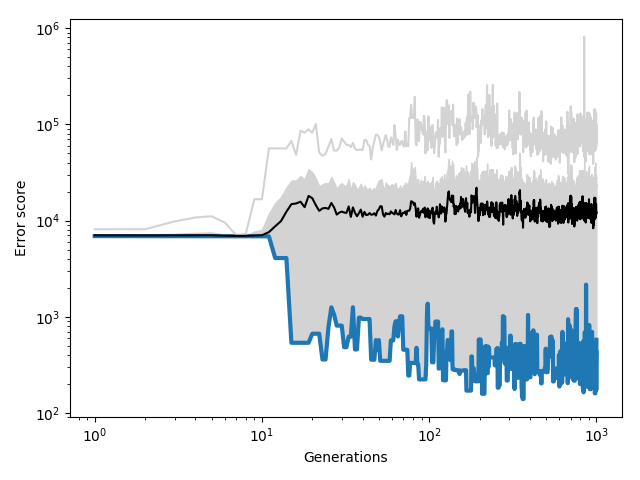

In [12]:
plot_log(log)

In [13]:
best_models = json.load(open('best_models.json'))
pandas.DataFrame(best_models).T

0           1           2           3  \
Ra.all            2.983889e+02  297.874487  297.433679  289.284530   
e_pas.all        -6.042226e+01  -61.643272  -62.938283  -65.440510   
g_pas.all         9.608096e-05    0.000091    0.000045    0.000079   
gbar_bk.somatic   9.759835e-03    0.024352    0.010731    0.000172   
gbar_kaf.basal    1.268676e-03    0.013301    0.036098    0.018782   
gbar_kaf.somatic  2.156735e+00    1.762274    1.817757    1.418957   
gbar_kas.basal    1.305085e-07    0.000003    0.000119    0.000002   
gbar_kas.somatic  8.617312e-03    0.008469    0.019541    0.022480   
gbar_kir.basal    3.260223e-04    0.000326    0.000206    0.000309   
gbar_kir.somatic  5.464061e-04    0.000239    0.000543    0.000438   
gbar_naf.basal    1.866531e-01    0.133862    0.209137    0.241283   
gbar_naf.somatic  2.572276e+01   23.409905   22.857760   24.374876   
gbar_sk.somatic   1.201255e-01    0.096089    0.056383    0.024257   

                           4           5           6             7  \
Ra.all            290.638581  297.176375  268.149696  2.890034e+02   
e_pas.all         -63.202956  -60.313263  -68.648045 -6.000238e+01   
g_pas.all           0.000088    0.000074    0.000090  7.209238e-05   
gbar_bk.somatic     0.014570    0.022857    0.007670  1.296416e-02   
gbar_kaf.basal      0.006963    0.012467    0.006427  3.888257e-02   
gbar_kaf.somatic    2.057737    1.901206    1.574539  1.894493e+00   
gbar_kas.basal      0.000023    0.000465    0.000007  8.420812e-08   
gbar_kas.somatic    0.000110    0.025444    0.029371  5.457592e-04   
gbar_kir.basal      0.000325    0.000254    0.000249  2.993836e-04   
gbar_kir.somatic    0.000024    0.000701    0.000367  2.032131e-04   
gbar_naf.basal      0.331495    0.191994    0.168015  4.894391e-01   
gbar_naf.somatic   25.982051   25.216213   22.587874  2.595697e+01   
gbar_sk.somatic     0.359407    0.032021    0.284397  3.224538e-01   

                             8             9  
Ra.all            2.830642e+02  2.028852e+02  
e_pas.all        -6.006109e+01 -6.303431e+01  
g_pas.all         8.757631e-05  4.391591e-05  
gbar_bk.somatic   1.264034e-02  9.096270e-03  
gbar_kaf.basal    5.507937e-02  6.788182e-02  
gbar_kaf.somatic  1.149181e+00  1.514628e+00  
gbar_kas.basal    1.968421e-07  4.224003e-07  
gbar_kas.somatic  3.095721e-03  1.020883e-02  
gbar_kir.basal    3.461115e-04  2.144856e-04  
gbar_kir.somatic  1.807751e-04  2.983872e-04  
gbar_naf.basal    3.552156e-01  3.349673e-01  
gbar_naf.somatic  2.062866e+01  2.494909e+01  
gbar_sk.somatic   1.237335e-01  1.724053e-02

In [14]:
evaluate_all = True
best_objectives = []
if evaluate_all:
    for params in best_models:
        objectives = evaluator.evaluate_with_dicts(params)
        best_objectives.append(objectives)
    df = pandas.DataFrame(best_objectives).T
    df = df.sort_index(axis=0, ascending=False)

<IPython.core.display.Javascript object>


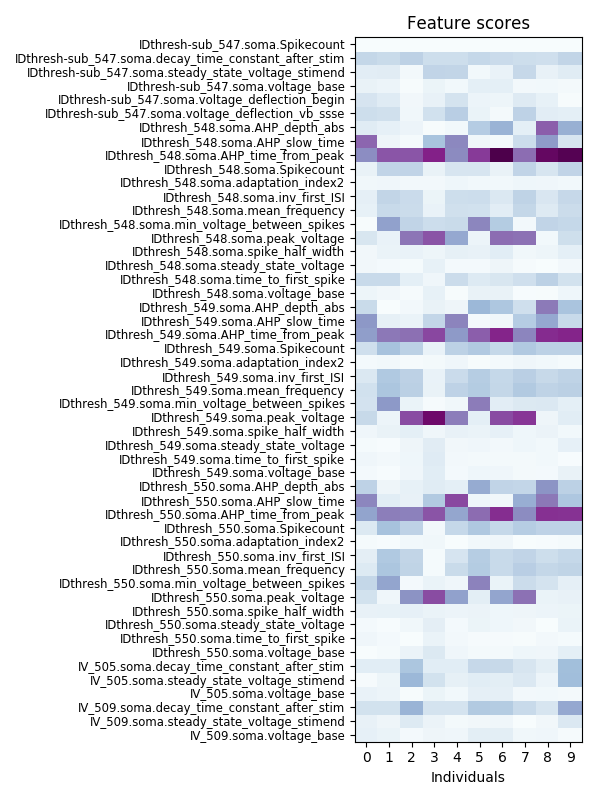

In [15]:
if evaluate_all:
    plot_scores(df, figsize=(6,8))

## Single-cell simulation

In [16]:
ind = 3 # 3, 1, 2, 5, 6
test_parameters = best_models[ind]

In [17]:
test_responses = evaluator.run_protocols(
    protocols=protocols.values(), 
    param_values=test_parameters)

<IPython.core.display.Javascript object>


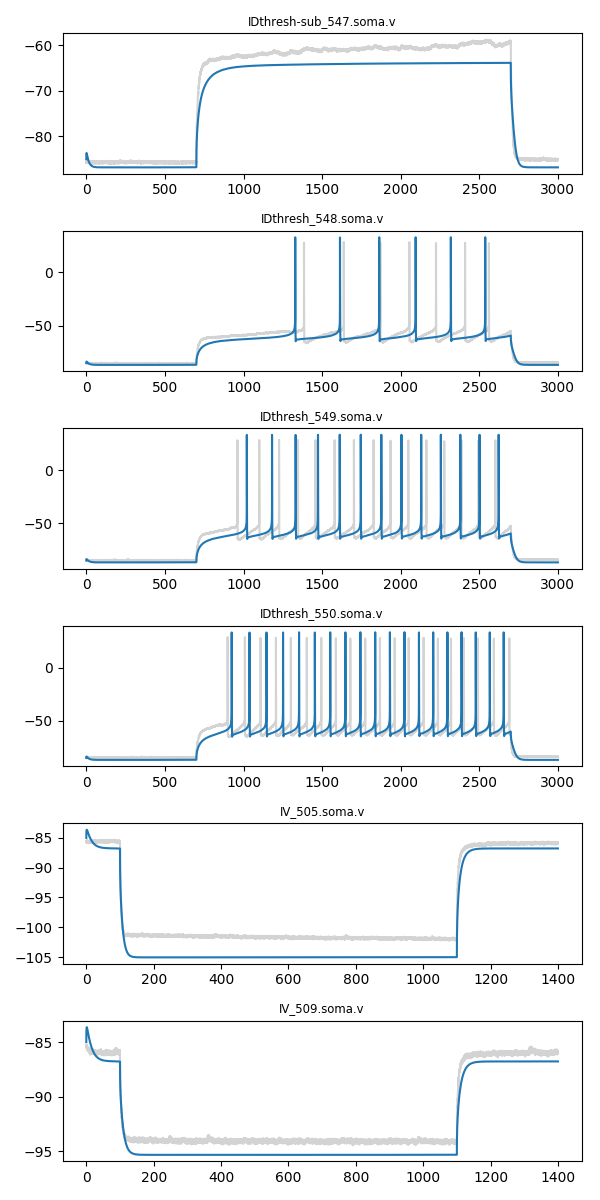

In [18]:
plot_responses(test_responses, expdata=expdata, junction_potential=9.5, figsize=(6,12))

<IPython.core.display.Javascript object>


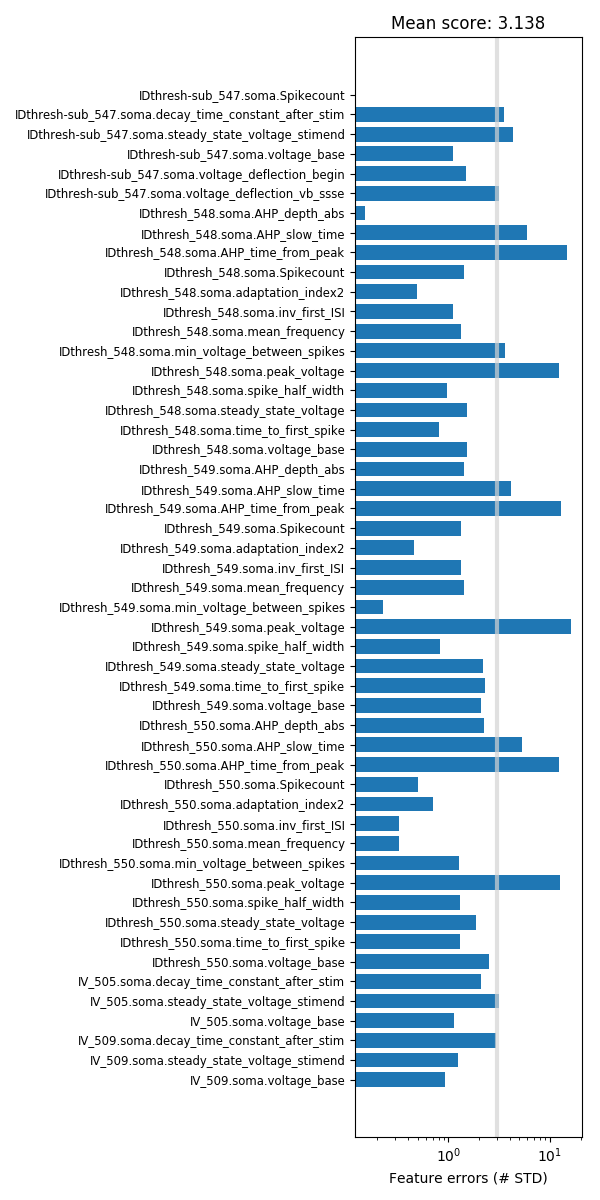

In [19]:
if evaluate_all:
    objectives = best_objectives[ind]
else:
    objectives = evaluator.evaluate_with_dicts(test_parameters)
plot_objectives(objectives, figsize=(6,12))

In [20]:
from numpy.linalg import norm
d = []
for i in range(len(best_models)):
    v = []
    for j in range(len(best_models)):
        p1 = np.array([best_models[i][p] for p in sorted(best_models[i])])
        p2 = np.array([best_models[j][p] for p in sorted(best_models[j])])
        v.append(norm((p1-p2)/(p1+p2)))
    d.append(v)
df = pandas.DataFrame(data=np.round(d,2))
df

0     1     2     3     4     5     6     7     8     9
0  0.00  1.37  1.53  1.79  1.90  1.57  1.40  1.54  1.28  1.48
1  1.37  0.00  1.37  1.32  1.71  1.34  1.11  1.62  1.31  1.44
2  1.53  1.37  0.00  1.51  1.87  0.95  1.40  1.69  1.50  1.29
3  1.79  1.32  1.51  0.00  2.11  1.45  1.48  1.96  1.78  1.45
4  1.90  1.71  1.87  2.11  0.00  1.90  1.52  1.61  1.83  2.09
5  1.57  1.34  0.95  1.45  1.90  0.00  1.44  1.85  1.73  1.51
6  1.40  1.11  1.40  1.48  1.52  1.44  0.00  1.68  1.64  1.66
7  1.54  1.62  1.69  1.96  1.61  1.85  1.68  0.00  1.00  1.54
8  1.28  1.31  1.50  1.78  1.83  1.73  1.64  1.00  0.00  1.14
9  1.48  1.44  1.29  1.45  2.09  1.51  1.66  1.54  1.14  0.00

In [21]:
selected = [3, 1, 2, 5, 6]   # from range(10)

In [22]:
hall_of_fame = []
for model in selected:
    hall_of_fame.append(best_models[model])
with open('hall_of_fame.json', 'w') as fp:
    json.dump(hall_of_fame, fp, indent=4, sort_keys=True)

In [23]:
with open('best_parameters.json', 'w') as fp:
    json.dump(test_parameters, fp, indent=4, sort_keys=True)